In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap
import cartopy.feature as cfeature
import cartopy.io.shapereader as shapereader

import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = 'Tahoma' 
mpl.rcParams['pdf.fonttype'] = 42

import geopandas as gp
import pandas as pd

### Import files

In [2]:
input_dir = 'D:/for_georgy/'

In [3]:
historical_year = 1900
input_dir_hist = '%s/historical_%s' % (input_dir, historical_year)

ff1_precip_hist_annual_aus  = xr.open_dataset('%s/aus/cesmlme-ff%s_precip_hist_annual_aus.nc' % (input_dir_hist, '1'))
ff2_precip_hist_annual_aus  = xr.open_dataset('%s/aus/cesmlme-ff%s_precip_hist_annual_aus.nc' % (input_dir_hist, '2'))
ff3_precip_hist_annual_aus  = xr.open_dataset('%s/aus/cesmlme-ff%s_precip_hist_annual_aus.nc' % (input_dir_hist, '3'))
ff4_precip_hist_annual_aus  = xr.open_dataset('%s/aus/cesmlme-ff%s_precip_hist_annual_aus.nc' % (input_dir_hist, '4'))
ff5_precip_hist_annual_aus  = xr.open_dataset('%s/aus/cesmlme-ff%s_precip_hist_annual_aus.nc' % (input_dir_hist, '5'))
ff6_precip_hist_annual_aus  = xr.open_dataset('%s/aus/cesmlme-ff%s_precip_hist_annual_aus.nc' % (input_dir_hist, '6'))
ff7_precip_hist_annual_aus  = xr.open_dataset('%s/aus/cesmlme-ff%s_precip_hist_annual_aus.nc' % (input_dir_hist, '7'))
ff8_precip_hist_annual_aus  = xr.open_dataset('%s/aus/cesmlme-ff%s_precip_hist_annual_aus.nc' % (input_dir_hist, '8'))
ff9_precip_hist_annual_aus  = xr.open_dataset('%s/aus/cesmlme-ff%s_precip_hist_annual_aus.nc' % (input_dir_hist, '9'))
ff10_precip_hist_annual_aus = xr.open_dataset('%s/aus/cesmlme-ff%s_precip_hist_annual_aus.nc' % (input_dir_hist, '10'))
ff11_precip_hist_annual_aus = xr.open_dataset('%s/aus/cesmlme-ff%s_precip_hist_annual_aus.nc' % (input_dir_hist, '11'))
ff12_precip_hist_annual_aus = xr.open_dataset('%s/aus/cesmlme-ff%s_precip_hist_annual_aus.nc' % (input_dir_hist, '12'))
ff13_precip_hist_annual_aus = xr.open_dataset('%s/aus/cesmlme-ff%s_precip_hist_annual_aus.nc' % (input_dir_hist, '13'))

bcc_precip_hist_annual_aus = xr.open_dataset('%s/aus/bcc_precip_hist_annual_aus.nc' % input_dir_hist)
ccsm4_precip_hist_annual_aus = xr.open_dataset('%s/aus/ccsm4_precip_hist_annual_aus.nc' % input_dir_hist)
csiro_mk3l_precip_hist_annual_aus = xr.open_dataset('%s/aus/csiro_mk3l_precip_hist_annual_aus.nc' % input_dir_hist)
fgoals_gl_precip_hist_annual_aus = xr.open_dataset('%s/aus/fgoals_gl_precip_hist_annual_aus.nc' % input_dir_hist)
fgoals_s2_precip_hist_annual_aus = xr.open_dataset('%s/aus/fgoals_s2_precip_hist_annual_aus.nc' % input_dir_hist)
giss_21_precip_hist_annual_aus = xr.open_dataset('%s/aus/giss_21_precip_hist_annual_aus.nc' % input_dir_hist)
giss_22_precip_hist_annual_aus = xr.open_dataset('%s/aus/giss_22_precip_hist_annual_aus.nc' % input_dir_hist)
giss_23_precip_hist_annual_aus = xr.open_dataset('%s/aus/giss_23_precip_hist_annual_aus.nc' % input_dir_hist)
giss_24_precip_hist_annual_aus = xr.open_dataset('%s/aus/giss_24_precip_hist_annual_aus.nc' % input_dir_hist)
giss_25_precip_hist_annual_aus = xr.open_dataset('%s/aus/giss_25_precip_hist_annual_aus.nc' % input_dir_hist)
giss_26_precip_hist_annual_aus = xr.open_dataset('%s/aus/giss_26_precip_hist_annual_aus.nc' % input_dir_hist)
giss_27_precip_hist_annual_aus = xr.open_dataset('%s/aus/giss_27_precip_hist_annual_aus.nc' % input_dir_hist)
giss_28_precip_hist_annual_aus = xr.open_dataset('%s/aus/giss_28_precip_hist_annual_aus.nc' % input_dir_hist)
hadcm3_precip_hist_annual_aus = xr.open_dataset('%s/aus/hadcm3_precip_hist_annual_aus.nc' % input_dir_hist)
ipsl_precip_hist_annual_aus = xr.open_dataset('%s/aus/ipsl_precip_hist_annual_aus.nc' % input_dir_hist)
miroc_precip_hist_annual_aus = xr.open_dataset('%s/aus/miroc_precip_hist_annual_aus.nc' % input_dir_hist)
mpi_precip_hist_annual_aus= xr.open_dataset('%s/aus/mpi_precip_hist_annual_aus.nc' % input_dir_hist)
mri_precip_hist_annual_aus = xr.open_dataset('%s/aus/mri_precip_hist_annual_aus.nc' % input_dir_hist)

In [4]:
awap_gf_annual = xr.open_dataset('%s/awap_gf_precip_hist_annual.nc' % input_dir_hist)

In [5]:
mdb = gp.read_file('D:/for_georgy/MDB_shapefile/Murray.shp')

### Define functions

In [6]:
def get_significance_for_plots(ds, ds_sig, drought_type, drought_type_sig, significance_threshold):
    # ds = original array
    # ds_sig = regridded version
    # models NEED to be in the same order in both
    
    ds_sig_0  = ds[0].where(ds_sig[0][drought_type_sig] < significance_threshold)
    ds_sig_1  = ds[1].where(ds_sig[1][drought_type_sig] < significance_threshold)
    ds_sig_2  = ds[2].where(ds_sig[2][drought_type_sig] < significance_threshold)
    ds_sig_3  = ds[3].where(ds_sig[3][drought_type_sig] < significance_threshold) 
    ds_sig_4  = ds[4].where(ds_sig[4][drought_type_sig] < significance_threshold)
    ds_sig_5  = ds[5].where(ds_sig[5][drought_type_sig] < significance_threshold)  
    ds_sig_6  = ds[6].where(ds_sig[6][drought_type_sig] < significance_threshold)  
    ds_sig_7  = ds[7].where(ds_sig[7][drought_type_sig] < significance_threshold)
    ds_sig_8  = ds[8].where(ds_sig[8][drought_type_sig] < significance_threshold)
    ds_sig_9  = ds[9].where(ds_sig[9][drought_type_sig] < significance_threshold) 
    ds_sig_10 = ds[10].where(ds_sig[10][drought_type_sig] < significance_threshold)
    ds_sig_11 = ds[11].where(ds_sig[11][drought_type_sig] < significance_threshold)
    
    ds_sig_out = [ds_sig_0, ds_sig_1, ds_sig_2, ds_sig_3, ds_sig_4, ds_sig_5, ds_sig_6, 
                  ds_sig_7, ds_sig_8, ds_sig_9, ds_sig_10, ds_sig_11]
    
    return ds_sig_out

In [7]:
# plot map
def plot_maps(lons, lats, data, cmap, contour_levels, colorbar_label, filename, drought_type, colorbar_ticks, colorbar_extend, cbar_minor_ticks=None, sig_test_type=None, sig=None):
    lons = lons
    lats = lats
    data = data
    cmaps = [cmap]
    norms = [BoundaryNorm(contour_levels, ncolors=cmap.N, clip=False)]
    
    label_fontsize= 9.5
    tick_fontsize = 7
    linewidth_border = 0.75
    shrink = 0.81  # for colorbar
    
    subplot_title = ['AWAP', 'bcc-csm1-1', 'CCSM4', 'CSIRO-Mk3L-1-2',  'FGOALS-s2', 
                     'GISS-E2-R', 'HadCM3', 'IPSL-CM5A-LR', 'MIROC-ESM',   'MPI-ESM-P', 
                     'MRI-CGCM3', 'CESM-LME']
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    # --- start plotting
    projection = ccrs.PlateCarree()
    
    axes_class = (GeoAxes, dict(map_projection=projection))
    
    # ------ actually plot
    fig = plt.figure(figsize=(15,10))
    axgr = AxesGrid(fig, 111, axes_class=axes_class,
                    nrows_ncols=(3, 4),
                    axes_pad=(0.35, 0.35), # spacing between axes. horizontal, vertical
                    label_mode='',
                    cbar_location='right', cbar_mode='single',
                    cbar_pad=0.2, cbar_size='3%')  # note the empty label_mode
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    for i, ax in enumerate(axgr):
       
        ax.set_extent([112, 155, -43, -10])
        ax.coastlines(color='#bdbdbd', linewidth=0.75)
        ax.gridlines(linewidth=0.1, alpha=0.3)
        
        if i == 0 or i == 4 or i == 8:
            for label in ax.get_yticklabels():
                label.set_visible(False)
        
        
        ax.set_xticks(np.arange(120, 160, 10), crs=projection)
        lon_formatter = LongitudeFormatter()
        ax.set_xticks(np.arange(115, 160, 5), minor=True)
        ax.xaxis.set_major_formatter(lon_formatter)
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(tick_fontsize)
         
        #    --- set up y ticks
        ax.set_yticks(np.arange(-40, 0, 10), crs=projection)
        ax.set_yticks(np.arange(-45,-5,5), minor=True)
        lat_formatter = LatitudeFormatter()
        ax.yaxis.set_major_formatter(lat_formatter)
        ax.yaxis.set_ticks_position('both')    
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(tick_fontsize)
        
        if i < 8:
            ax.xaxis.set_ticks_position('both')
            ax.tick_params(axis='x', pad=6.5)
        
        if i >= 8:
            ax.xaxis.set_ticks_position('both')
            for label in ax.get_xticklabels():
                label.set_visible(False)
                
        if i % 4 != 0:
            # y ticks
            lat_formatter = LatitudeFormatter()
            ax.yaxis.set_major_formatter(lat_formatter)
            for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(tick_fontsize)
            ax.tick_params(axis='y', pad=1)
            ax.yaxis.set_ticks_position('both')

        ax.xaxis.set_tick_params(width=linewidth_border, which='both')
        ax.yaxis.set_tick_params(width=linewidth_border, which='both')
    
        
        # plot Aus as black outline
        shpfilename = shapereader.natural_earth(resolution='50m',
                                                category='cultural',
                                                name='admin_0_countries')
        
        reader = shapereader.Reader(shpfilename)
        countries = reader.records()
    
        for country in countries:
            if country.attributes['ADM0_A3'] == 'AUS':
                ax.add_geometries(country.geometry, ccrs.PlateCarree(), edgecolor='k', facecolor='none')
        
        #Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
        states_provinces = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines',
                                                        scale='50m', facecolor='none')
        ax.add_feature(states_provinces, edgecolor='#737373', linewidth=0.75)  # plot state lines
        
        ax.add_geometries(mdb.geometry, crs=ccrs.PlateCarree(), edgecolor='#d6604d', facecolor='none', linewidth=0.75, alpha=0.8)  # MDB
        
        # plot the data!
        p = ax.pcolormesh(lons[i], lats[i], data[i], 
                      transform=ccrs.PlateCarree(), cmap=cmaps[0], norm=norms[0])
    
        if sig != None:
            if i <= 13:
                df_data_sig = data_sig[i].to_dataframe()
                df_data_sig = df_data_sig.dropna()
                df_data_sig = df_data_sig.reset_index()
                p2 = ax.scatter(df_data_sig.lon, df_data_sig.lat, s=2, c='k', transform=ccrs.PlateCarree())    
        
        text_x = 0.04
        text_y = 0.885
        
        ax.text(text_x, text_y + 0.009, subplot_title[i], transform=ax.transAxes,
                horizontalalignment='left', verticalalignment='bottom', 
                fontweight='normal', fontsize=label_fontsize, color='white',
                bbox=dict(facecolor='white', edgecolor='black', linewidth=0.3, pad=3.0))
        
        ax.text(text_x, text_y, subplot_title[i], transform=ax.transAxes,
                horizontalalignment='left', verticalalignment='bottom',
                fontweight='normal', fontsize=label_fontsize)
  
    
    cbar = plt.colorbar(p, cax=axgr.cbar_axes[0], extend=colorbar_extend, extendfrac=0.03, ticks=colorbar_ticks)
    cbar.set_label(colorbar_label[0], fontsize=10)
    if cbar_minor_ticks != None:
        cbar.ax.yaxis.set_ticks(cbar_minor_ticks_actual, minor=True)
    
    fig.savefig('%s_%s.pdf' % (filename, drought_type), dpi=300, bbox_inches='tight')

    plt.show()

In [8]:
def calculate_cv(ds):
    ds['CV'] = ds.PRECT_mm.std(dim='year') / ds.PRECT_mm.mean(dim='year')
    return ds

In [9]:
def calculate_map(ds):
    ds['MAP'] = ds.PRECT_mm.mean(dim='year')
    return ds

### Common plot inputs

In [10]:
lons_hist = [awap_gf_annual.lon, bcc_precip_hist_annual_aus.lon, ccsm4_precip_hist_annual_aus.lon, 
             csiro_mk3l_precip_hist_annual_aus.lon, 
             fgoals_s2_precip_hist_annual_aus.lon, giss_28_precip_hist_annual_aus.lon, 
             hadcm3_precip_hist_annual_aus.lon, ipsl_precip_hist_annual_aus.lon, 
             miroc_precip_hist_annual_aus.lon, mpi_precip_hist_annual_aus.lon,
             mri_precip_hist_annual_aus.lon,ff2_precip_hist_annual_aus.lon]

lats_hist = [awap_gf_annual.lat, bcc_precip_hist_annual_aus.lat,  ccsm4_precip_hist_annual_aus.lat, 
             csiro_mk3l_precip_hist_annual_aus.lat,  
             fgoals_s2_precip_hist_annual_aus.lat, giss_28_precip_hist_annual_aus.lat, 
             hadcm3_precip_hist_annual_aus.lat, ipsl_precip_hist_annual_aus.lat,
             miroc_precip_hist_annual_aus.lat, mpi_precip_hist_annual_aus.lat, 
             mri_precip_hist_annual_aus.lat, ff2_precip_hist_annual_aus.lat]

### Calculate CV and MAP for each model

In [11]:
calculate_cv(awap_gf_annual)
calculate_map(awap_gf_annual)

calculate_cv(bcc_precip_hist_annual_aus)
calculate_cv(ccsm4_precip_hist_annual_aus)
calculate_cv(csiro_mk3l_precip_hist_annual_aus)
calculate_cv(fgoals_s2_precip_hist_annual_aus)
calculate_cv(giss_28_precip_hist_annual_aus)
calculate_cv(hadcm3_precip_hist_annual_aus)
calculate_cv(ipsl_precip_hist_annual_aus)
calculate_cv(miroc_precip_hist_annual_aus)
calculate_cv(mpi_precip_hist_annual_aus)
calculate_cv(mri_precip_hist_annual_aus)

# the CESMs
calculate_cv(ff1_precip_hist_annual_aus)
calculate_cv(ff2_precip_hist_annual_aus)
calculate_cv(ff3_precip_hist_annual_aus)
calculate_cv(ff4_precip_hist_annual_aus)
calculate_cv(ff5_precip_hist_annual_aus)
calculate_cv(ff6_precip_hist_annual_aus)
calculate_cv(ff7_precip_hist_annual_aus)
calculate_cv(ff8_precip_hist_annual_aus)
calculate_cv(ff9_precip_hist_annual_aus)
calculate_cv(ff10_precip_hist_annual_aus)
calculate_cv(ff11_precip_hist_annual_aus)
calculate_cv(ff12_precip_hist_annual_aus)
calculate_cv(ff13_precip_hist_annual_aus)

<xarray.Dataset>
Dimensions:                           (year: 101, lat: 15, lon: 16)
Coordinates:
  * lat                               (lat) float64 -42.63 -36.95 ... -12.32
  * lon                               (lon) float64 115.0 117.5 ... 150.0 152.5
  * year                              (year) int64 1900 1901 1902 ... 1999 2000
Data variables: (12/43)
    PRECT                             (year, lat, lon) float32 ...
    PRECT_mm                          (year, lat, lon) float64 nan nan ... nan
    drought_years_2s2e                (year, lat, lon) float64 ...
    drought_years_median              (year, lat, lon) float64 ...
    drought_years_20perc              (year, lat, lon) float64 ...
    drought_years_120pc_2med          (year, lat, lon) float64 ...
    ...                                ...
    droughts_2s2e_severity            (year, lat, lon) float64 ...
    droughts_median_severity          (year, lat, lon) float64 ...
    droughts_20perc_severity          (year, lat, lon) float64 ...
    droughts_120pc_2med_severity      (year, lat, lon) float64 ...
    droughts_220pc_1med_severity      (year, lat, lon) float64 ...
    CV                                (lat, lon) float64 nan nan nan ... nan nan

In [12]:
calculate_map(bcc_precip_hist_annual_aus)
calculate_map(ccsm4_precip_hist_annual_aus)
calculate_map(csiro_mk3l_precip_hist_annual_aus)
calculate_map(fgoals_s2_precip_hist_annual_aus)
calculate_map(giss_28_precip_hist_annual_aus)
calculate_map(hadcm3_precip_hist_annual_aus)
calculate_map(ipsl_precip_hist_annual_aus)
calculate_map(miroc_precip_hist_annual_aus)
calculate_map(mpi_precip_hist_annual_aus)
calculate_map(mri_precip_hist_annual_aus)

# the CESMs
calculate_map(ff1_precip_hist_annual_aus)
calculate_map(ff2_precip_hist_annual_aus)
calculate_map(ff3_precip_hist_annual_aus)
calculate_map(ff4_precip_hist_annual_aus)
calculate_map(ff5_precip_hist_annual_aus)
calculate_map(ff6_precip_hist_annual_aus)
calculate_map(ff7_precip_hist_annual_aus)
calculate_map(ff8_precip_hist_annual_aus)
calculate_map(ff9_precip_hist_annual_aus)
calculate_map(ff10_precip_hist_annual_aus)
calculate_map(ff11_precip_hist_annual_aus)
calculate_map(ff12_precip_hist_annual_aus)
calculate_map(ff13_precip_hist_annual_aus)

<xarray.Dataset>
Dimensions:                           (year: 101, lat: 15, lon: 16)
Coordinates:
  * lat                               (lat) float64 -42.63 -36.95 ... -12.32
  * lon                               (lon) float64 115.0 117.5 ... 150.0 152.5
  * year                              (year) int64 1900 1901 1902 ... 1999 2000
Data variables: (12/44)
    PRECT                             (year, lat, lon) float32 nan nan ... nan
    PRECT_mm                          (year, lat, lon) float64 nan nan ... nan
    drought_years_2s2e                (year, lat, lon) float64 nan nan ... nan
    drought_years_median              (year, lat, lon) float64 nan nan ... nan
    drought_years_20perc              (year, lat, lon) float64 nan nan ... nan
    drought_years_120pc_2med          (year, lat, lon) float64 nan nan ... nan
    ...                                ...
    droughts_median_severity          (year, lat, lon) float64 nan nan ... nan
    droughts_20perc_severity          (year, lat, lon) float64 nan nan ... nan
    droughts_120pc_2med_severity      (year, lat, lon) float64 nan nan ... nan
    droughts_220pc_1med_severity      (year, lat, lon) float64 nan nan ... nan
    CV                                (lat, lon) float64 nan nan nan ... nan nan
    MAP                               (lat, lon) float64 nan nan nan ... nan nan

In [13]:
# calculated CESM ensemble mean
cesm_con = xr.concat([ff1_precip_hist_annual_aus, ff2_precip_hist_annual_aus,
                     ff13_precip_hist_annual_aus, ff4_precip_hist_annual_aus,
                     ff5_precip_hist_annual_aus, ff6_precip_hist_annual_aus,
                     ff7_precip_hist_annual_aus, ff8_precip_hist_annual_aus,
                     ff9_precip_hist_annual_aus, ff10_precip_hist_annual_aus,
                     ff11_precip_hist_annual_aus, ff12_precip_hist_annual_aus,
                     ff13_precip_hist_annual_aus], dim = "ensmem")

cesm_cv_mean = cesm_con['CV'].mean(('ensmem'))
cesm_map_mean = cesm_con['MAP'].mean(('ensmem'))

### Calculate CV and MAP for observations, regridded to match each model

In [14]:
floc = 'D:/for_georgy/historical_1900/awap_regridded/'

awap_bcc = xr.open_dataset(floc + 'awap_gf_annual_regridded_to_bcc.nc')
awap_ccsm4 = xr.open_dataset(floc + 'awap_gf_annual_regridded_to_ccsm4.nc')
awap_csiro_mk3l = xr.open_dataset(floc + 'awap_gf_annual_regridded_to_csiro_mk3l.nc')
awap_fgoals_s2 = xr.open_dataset(floc + 'awap_gf_annual_regridded_to_fgoals_s2.nc')
awap_giss = xr.open_dataset(floc + 'awap_gf_annual_regridded_to_giss.nc')
awap_hadcm3 = xr.open_dataset(floc + 'awap_gf_annual_regridded_to_hadcm3.nc')
awap_ipsl = xr.open_dataset(floc + 'awap_gf_annual_regridded_to_ipsl.nc')
awap_miroc = xr.open_dataset(floc + 'awap_gf_annual_regridded_to_miroc.nc')
awap_mpi = xr.open_dataset(floc + 'awap_gf_annual_regridded_to_mpi.nc')
awap_mri = xr.open_dataset(floc + 'awap_gf_annual_regridded_to_mri.nc')
awap_cesmlme = xr.open_dataset(floc + 'awap_gf_annual_regridded_to_cesmlme.nc')

In [15]:
calculate_cv(awap_bcc)
calculate_cv(awap_ccsm4)
calculate_cv(awap_csiro_mk3l)
calculate_cv(awap_fgoals_s2)
calculate_cv(awap_giss)
calculate_cv(awap_hadcm3)
calculate_cv(awap_ipsl)
calculate_cv(awap_bcc)
calculate_cv(awap_miroc)
calculate_cv(awap_mpi)
calculate_cv(awap_mri)
calculate_cv(awap_cesmlme)

calculate_map(awap_bcc)
calculate_map(awap_ccsm4)
calculate_map(awap_csiro_mk3l)
calculate_map(awap_fgoals_s2)
calculate_map(awap_giss)
calculate_map(awap_hadcm3)
calculate_map(awap_ipsl)
calculate_map(awap_bcc)
calculate_map(awap_miroc)
calculate_map(awap_mpi)
calculate_map(awap_mri)
calculate_map(awap_cesmlme)

<xarray.Dataset>
Dimensions:                           (year: 101, lat: 15, lon: 16)
Coordinates:
  * year                              (year) int64 1900 1901 1902 ... 1999 2000
  * lat                               (lat) float64 -42.63 -36.95 ... -12.32
  * lon                               (lon) float64 115.0 117.5 ... 150.0 152.5
Data variables: (12/44)
    pre                               (year, lat, lon) float32 ...
    PRECT_mm                          (year, lat, lon) float32 nan nan ... nan
    drought_years_2s2e                (year, lat, lon) int64 ...
    drought_years_median              (year, lat, lon) float32 ...
    drought_years_20perc              (year, lat, lon) float32 ...
    drought_years_120pc_2med          (year, lat, lon) int64 ...
    ...                                ...
    droughts_median_severity          (year, lat, lon) float64 ...
    droughts_20perc_severity          (year, lat, lon) float64 ...
    droughts_120pc_2med_severity      (year, lat, lon) float64 ...
    droughts_220pc_1med_severity      (year, lat, lon) float64 ...
    CV                                (lat, lon) float32 nan nan nan ... nan nan
    MAP                               (lat, lon) float32 nan nan nan ... nan nan
Attributes:
    regrid_method:  bilinear

### Create bias grids

In [16]:
drought_type = 'CV'

bcc_diff_cv = bcc_precip_hist_annual_aus[drought_type] - awap_bcc[drought_type]
ccsm4_diff_cv = ccsm4_precip_hist_annual_aus[drought_type] - awap_ccsm4[drought_type]
csiro_diff_cv = csiro_mk3l_precip_hist_annual_aus[drought_type] - awap_csiro_mk3l[drought_type]
fgoals_diff_cv = fgoals_s2_precip_hist_annual_aus[drought_type] - awap_fgoals_s2[drought_type]
giss_diff_cv = giss_28_precip_hist_annual_aus[drought_type] - awap_giss[drought_type]
had_diff_cv = hadcm3_precip_hist_annual_aus[drought_type] - awap_hadcm3[drought_type]
ipsl_diff_cv = ipsl_precip_hist_annual_aus[drought_type] - awap_ipsl[drought_type]
miroc_diff_cv = miroc_precip_hist_annual_aus[drought_type] - awap_miroc[drought_type]
mpi_diff_cv = mpi_precip_hist_annual_aus[drought_type] - awap_mpi[drought_type]
mri_diff_cv = mri_precip_hist_annual_aus[drought_type] - awap_mri[drought_type]

In [17]:
drought_type = 'MAP'

bcc_diff_map = bcc_precip_hist_annual_aus[drought_type] - awap_bcc[drought_type]
ccsm4_diff_map = ccsm4_precip_hist_annual_aus[drought_type] - awap_ccsm4[drought_type]
csiro_diff_map = csiro_mk3l_precip_hist_annual_aus[drought_type] - awap_csiro_mk3l[drought_type]
fgoals_diff_map = fgoals_s2_precip_hist_annual_aus[drought_type] - awap_fgoals_s2[drought_type]
giss_diff_map = giss_28_precip_hist_annual_aus[drought_type] - awap_giss[drought_type]
had_diff_map = hadcm3_precip_hist_annual_aus[drought_type] - awap_hadcm3[drought_type]
ipsl_diff_map = ipsl_precip_hist_annual_aus[drought_type] - awap_ipsl[drought_type]
miroc_diff_map = miroc_precip_hist_annual_aus[drought_type] - awap_miroc[drought_type]
mpi_diff_map = mpi_precip_hist_annual_aus[drought_type] - awap_mpi[drought_type]
mri_diff_map = mri_precip_hist_annual_aus[drought_type] - awap_mri[drought_type]

In [18]:
# for CESM
drought_type = 'CV'

ff1_diff_cv = ff1_precip_hist_annual_aus[drought_type] - awap_cesmlme[drought_type]
ff2_diff_cv = ff2_precip_hist_annual_aus[drought_type] - awap_cesmlme[drought_type]
ff3_diff_cv = ff3_precip_hist_annual_aus[drought_type] - awap_cesmlme[drought_type]
ff4_diff_cv = ff4_precip_hist_annual_aus[drought_type] - awap_cesmlme[drought_type]
ff5_diff_cv = ff5_precip_hist_annual_aus[drought_type] - awap_cesmlme[drought_type]
ff6_diff_cv = ff6_precip_hist_annual_aus[drought_type] - awap_cesmlme[drought_type]
ff7_diff_cv = ff7_precip_hist_annual_aus[drought_type] - awap_cesmlme[drought_type]
ff8_diff_cv = ff8_precip_hist_annual_aus[drought_type] - awap_cesmlme[drought_type]
ff9_diff_cv = ff9_precip_hist_annual_aus[drought_type] - awap_cesmlme[drought_type]
ff10_diff_cv = ff10_precip_hist_annual_aus[drought_type] - awap_cesmlme[drought_type]
ff11_diff_cv = ff11_precip_hist_annual_aus[drought_type] - awap_cesmlme[drought_type]
ff12_diff_cv = ff12_precip_hist_annual_aus[drought_type] - awap_cesmlme[drought_type]
ff13_diff_cv = ff13_precip_hist_annual_aus[drought_type] - awap_cesmlme[drought_type]

In [19]:
# for CESM
drought_type = 'MAP'

ff1_diff_map = ff1_precip_hist_annual_aus[drought_type] - awap_cesmlme[drought_type]
ff2_diff_map = ff2_precip_hist_annual_aus[drought_type] - awap_cesmlme[drought_type]
ff3_diff_map = ff3_precip_hist_annual_aus[drought_type] - awap_cesmlme[drought_type]
ff4_diff_map = ff4_precip_hist_annual_aus[drought_type] - awap_cesmlme[drought_type]
ff5_diff_map = ff5_precip_hist_annual_aus[drought_type] - awap_cesmlme[drought_type]
ff6_diff_map = ff6_precip_hist_annual_aus[drought_type] - awap_cesmlme[drought_type]
ff7_diff_map = ff7_precip_hist_annual_aus[drought_type] - awap_cesmlme[drought_type]
ff8_diff_map = ff8_precip_hist_annual_aus[drought_type] - awap_cesmlme[drought_type]
ff9_diff_map = ff9_precip_hist_annual_aus[drought_type] - awap_cesmlme[drought_type]
ff10_diff_map = ff10_precip_hist_annual_aus[drought_type] - awap_cesmlme[drought_type]
ff11_diff_map = ff11_precip_hist_annual_aus[drought_type] - awap_cesmlme[drought_type]
ff12_diff_map = ff12_precip_hist_annual_aus[drought_type] - awap_cesmlme[drought_type]
ff13_diff_map = ff13_precip_hist_annual_aus[drought_type] - awap_cesmlme[drought_type]

In [22]:
cesm_diff_cv_con = xr.concat([ff1_diff_cv, ff2_diff_cv, ff3_diff_cv, ff4_diff_cv, ff5_diff_cv, ff6_diff_cv, ff7_diff_cv,
                          ff8_diff_cv, ff9_diff_cv, ff10_diff_cv, ff11_diff_cv, ff12_diff_cv, ff13_diff_cv], dim = "ensmem")

cesm_diff_cv_mean = cesm_diff_cv_con.mean(('ensmem'))

In [23]:
cesm_diff_map_con = xr.concat([ff1_diff_map, ff2_diff_map, ff3_diff_map, ff4_diff_map, ff5_diff_map, ff6_diff_map, ff7_diff_map,
                          ff8_diff_map, ff9_diff_map, ff10_diff_map, ff11_diff_map, ff12_diff_map, ff13_diff_map], dim = "ensmem")

cesm_diff_map_mean = cesm_diff_map_con.mean(('ensmem'))

### Plot MAP and CV as bias relative to observations

C:\Users\u5738998\Miniconda3\envs\pmip-droughts\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\u5738998\AppData\Local\Temp\ipykernel_2568\3146364632.py:49: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(tick_fontsize)
C:\Users\u5738998\AppData\Local\Temp\ipykernel_2568\3146364632.py:58: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(tick_fontsize)
C:\Users\u5738998\AppData\Local\Temp\ipykernel_2568\3146364632.py:49: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(tick_f

meta NOT subset; don't know how to subset; dropped


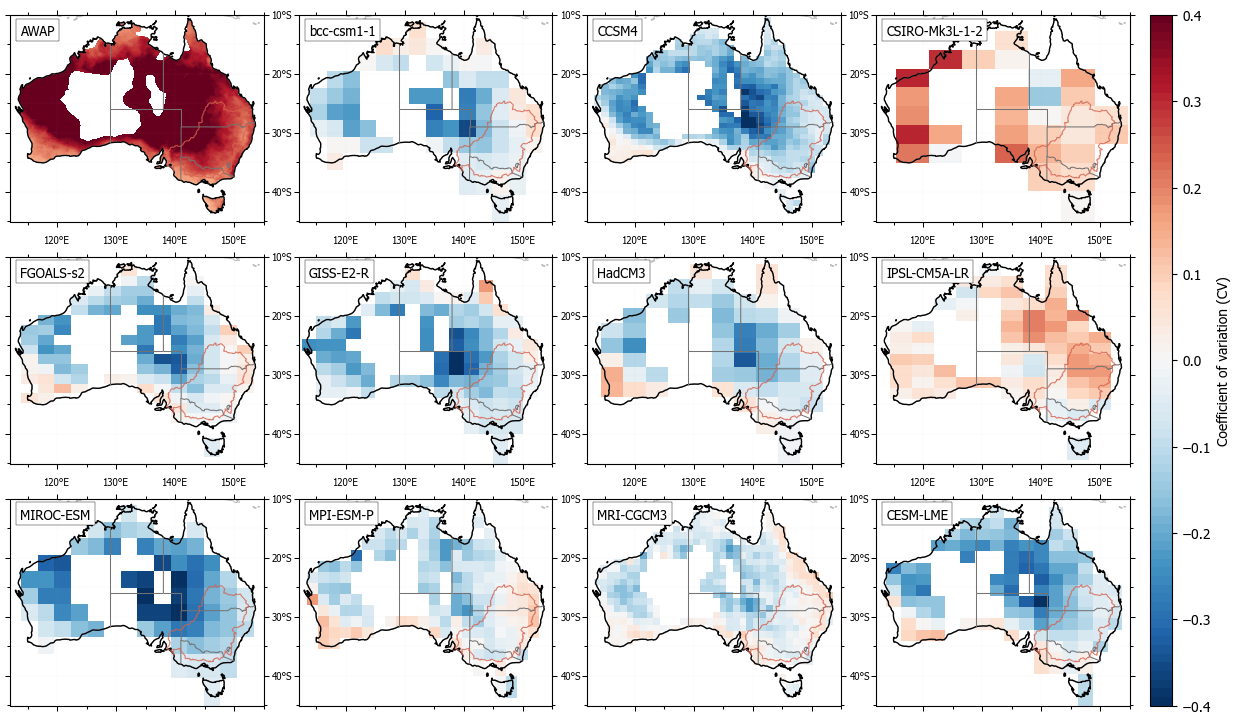

In [26]:
# and map: CV
drought_type = 'CV'

data_hist = [awap_gf_annual[drought_type], bcc_diff_cv, ccsm4_diff_cv, 
            csiro_diff_cv,
             fgoals_diff_cv, giss_diff_cv,
             had_diff_cv, ipsl_diff_cv,
             miroc_diff_cv, mpi_diff_cv,
             mri_diff_cv, cesm_diff_cv_mean]

colorbar_label = ['Coefficient of variation (CV)']
contour_levels_max = np.arange(-0.4, 0.41, 0.01)
cmap = plt.cm.get_cmap('RdBu_r')
cbar_minor_ticks_actual = np.arange(-0.4, 0.41, 0.1)


plot_maps(lons_hist, lats_hist, data_hist, cmap, contour_levels_max,
          colorbar_label, 'Fig2', drought_type, cbar_minor_ticks_actual, None, cbar_minor_ticks=True)

C:\Users\u5738998\Miniconda3\envs\pmip-droughts\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\u5738998\AppData\Local\Temp\ipykernel_2568\3146364632.py:49: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(tick_fontsize)
C:\Users\u5738998\AppData\Local\Temp\ipykernel_2568\3146364632.py:58: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(tick_fontsize)
C:\Users\u5738998\AppData\Local\Temp\ipykernel_2568\3146364632.py:49: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(tick_f

meta NOT subset; don't know how to subset; dropped


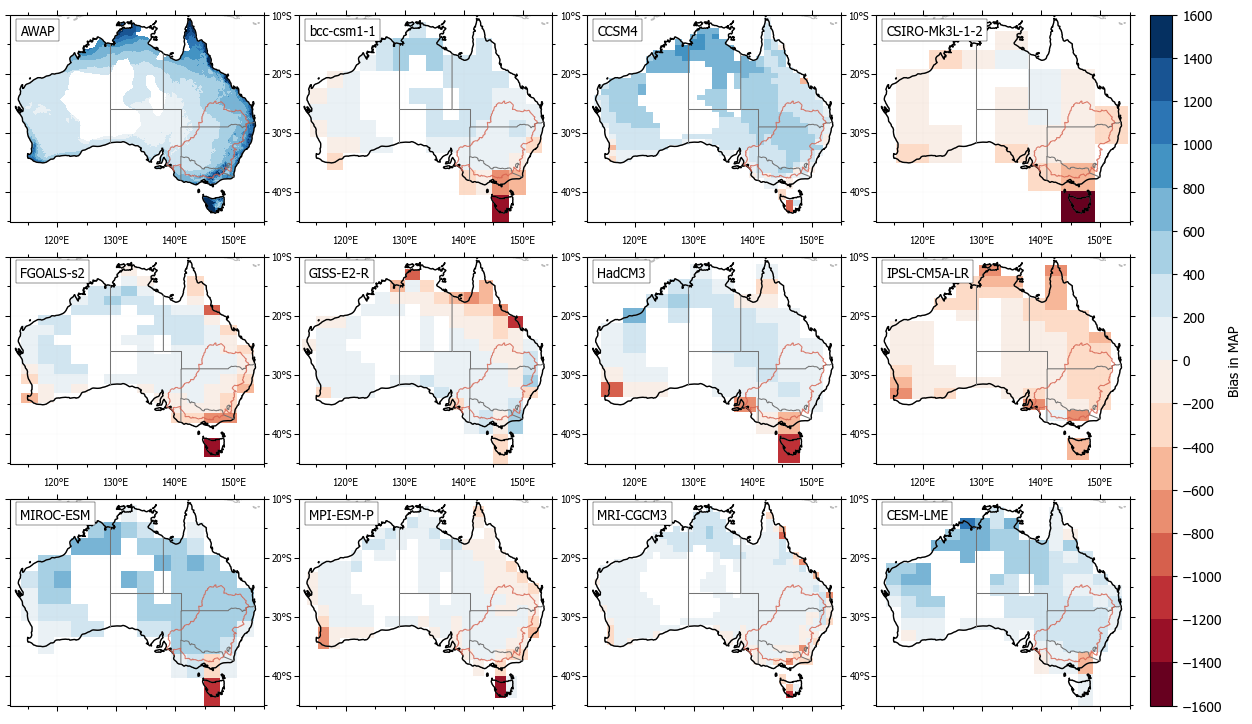

In [25]:
# and map: MAP
drought_type = 'MAP'

data_hist = [awap_gf_annual[drought_type], bcc_diff_map, ccsm4_diff_map, 
            csiro_diff_map,
             fgoals_diff_map, giss_diff_map,
             had_diff_map, ipsl_diff_map,
             miroc_diff_map, mpi_diff_map,
             mri_diff_map, cesm_diff_map_mean]

colorbar_label = ['Bias in MAP']
contour_levels_max = np.arange(-1600, 1601, 200)
cmap = plt.cm.get_cmap('RdBu')
cbar_minor_ticks_actual = np.arange(-1600, 1601, 200)


plot_maps(lons_hist, lats_hist, data_hist, cmap, contour_levels_max,
          colorbar_label, 'Fig2', drought_type, cbar_minor_ticks_actual, None, cbar_minor_ticks=True)